# Survival Analysis

CHAID analysis (Chi Squared Automatic Interaction Detection) is a statistical technique that applied in market research. It is mainly used to understand the characteristics that are most associated with a given outcome or group membership.

It is different from classic clusering techniques because it has a dependent variable or an output (clustering techniques only have independent variables)

Cases: direct marketing, customer segmentation, customer satisfaction, employee satisfaction

Steps:
1. Variable seleccion
2. Transforming coninuous variables into dummies. All variables should be dummies (you have to transform continuous varaibles into dummies)
3. Do your first tree
4. Prune it for better interpretability


## Case of study: Labor Market Ethnic Discrimination 

We want to analyze:
1. what drives people to get callbacks when they apply jobs (if you send your resume what makes you so that you get a call?). 

2. if people with ethnic names have higher or lower likelihood of getting a callback when they send resumes.

### 1. Prepare Datasets

#### Set directory

In [1]:
%cd C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\3. CHAID

C:\Users\jilli\Desktop\PROJECTS\5_DATA_MINING\Data Mining for Business in Python-20221025T033547Z-001\Data Mining for Business in Python\3. CHAID


#### Install and import libraries

In [2]:
!pip install chaid
#visualizing chaid
!pip install orca 
#visualizing chaid
!pip install graphviz 

  Using cached CHAID-5.3.0-py3-none-any.whl (17 kB)
  Using cached savReaderWriter-3.4.2-py3-none-any.whl
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached treelib-1.6.1-py3-none-any.whl
  Using cached orca-1.8-py2.py3-none-any.whl (19 kB)


In [3]:
!pip install plotly>=5.13.0
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"chmod" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.
"apt-get" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [4]:
!pip install plotly>=5.13.0

In [5]:
!pip install graphviz

In [6]:
conda install -c alubbock pygraphviz

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jilli\anaconda3

  added / updated specs:
    - pygraphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    graphviz-2.41              |                0         4.6 MB  alubbock
    pygraphviz-1.5             |           py39_0         122 KB  alubbock
    ------------------------------------------------------------
                                           Total:         4.7 MB

The following NEW packages will be INSTALLED:

  graphviz           alubbock/win-64::graphviz-2.41-0 
  pygraphviz         alubbock/win-64::pygraphviz-1.5-py39_0 




graphviz-2.41        | 4.6 MB    |            |   0% 

pygraphviz-1.5       | 122 KB    |            |   0% 

pygraphviz-1.5       | 122 KB    | ########## | 100% 

pygraphviz-1.5       | 122 KB    | ########## | 1

In [7]:
!pip install pygraphviz-1.3.1-cp27-none-win_amd64.whl

ERROR: pygraphviz-1.3.1-cp27-none-win_amd64.whl is not a supported wheel on this platform.


In [8]:
 conda update -n base -c conda-forge conda

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jilli\anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-pack-0.7.0           |     pyh6c4a22f_0          30 KB  conda-forge
    conda-package-handling-2.0.2|     pyh38be061_0         247 KB  conda-forge
    conda-package-streaming-0.7.0|     pyhd8ed1ab_1          17 KB  conda-forge
    conda-repo-cli-1.0.27      |   py39haa95532_0         130 KB
    freetype-2.10.4            |       hd328e21_0         489 KB  conda-forge
    libzopfli-1.0.3            |       ha925a31_0         202 KB  conda-forge
    m2-msys2-runtime-2.5.0.17080.65c939c|                3         3.0 MB  conda-forge
    m2-patch-2.7.5             |                2          90 KB  conda-forge
    m2w64-libwinpthread-git-5.0.0.4634.697f757|                2          31 KB  co

In [9]:
pip install --global-option=build_ext --global-option="-IC:\Program Files\Graphviz2.38\include" --global-option="-LC:\Program Files\Graphviz2.38\lib\" pygraphviz


Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [3]:
#import libraries
import pandas as pd
import statsmodels.api as sm # to get data
from CHAID import Tree

#### Import data

In [4]:
#import data (from datasets, use the function 
# get_rdataset(dataname, package='datasets') to get the dataset called ResumeNames)
data = sm.datasets.get_rdataset("ResumeNames",
                                package = "AER").data 
data.head()                               

,name,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,Allison,female,cauc,low,no,chicago,2,6,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,Kristen,female,cauc,high,no,chicago,3,6,no,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,Lakisha,female,afam,low,no,chicago,1,6,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,Latonya,female,afam,high,no,chicago,4,6,no,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,Carrie,female,cauc,high,no,chicago,3,22,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


In [2]:
conda install conda-forge/graphviz

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - conda-forge/graphviz

Current channels:

  - https://conda.anaconda.org/conda-forge/win-64
  - https://conda.anaconda.org/conda-forge/noarch
  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




Important variables
- call: dependent variable
- ethnicity: independent variable of interest



#### Transform data

Drop name variable because it is too much noise when we run the model

In [5]:
#remove name variable
data = data.iloc[:,1:] #ignore column 0
data.head()

,gender,ethnicity,quality,call,city,jobs,experience,honors,volunteer,military,...,minimum,equal,wanted,requirements,reqexp,reqcomm,reqeduc,reqcomp,reqorg,industry
0,female,cauc,low,no,chicago,2,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
1,female,cauc,high,no,chicago,3,6,no,yes,yes,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
2,female,afam,low,no,chicago,1,6,no,no,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
3,female,afam,high,no,chicago,4,6,no,yes,no,...,5,yes,supervisor,yes,yes,no,no,yes,no,manufacturing
4,female,cauc,high,no,chicago,3,22,no,no,no,...,some,yes,secretary,yes,yes,no,no,yes,yes,health/education/social services


In [6]:
#find unique values per variable. Por instance, experience have 26 answers
data.apply(pd.Series.nunique)

gender           2
ethnicity        2
quality          2
call             2
city             2
jobs             7
experience      26
honors           2
volunteer        2
military         2
holes            2
school           2
email            2
computer         2
special          2
college          2
minimum         13
equal            2
wanted           6
requirements     2
reqexp           2
reqcomm          2
reqeduc          2
reqcomp          2
reqorg           2
industry         7
dtype: int64

In [7]:
#Check categories with value_counts() 
data.gender.value_counts()

female    3746
male      1124
Name: gender, dtype: int64

In [8]:
data.dtypes

gender          object
ethnicity       object
quality         object
call            object
city            object
jobs             int64
experience       int64
honors          object
volunteer       object
military        object
holes           object
school          object
email           object
computer        object
special         object
college         object
minimum         object
equal           object
wanted          object
requirements    object
reqexp          object
reqcomm         object
reqeduc         object
reqcomp         object
reqorg          object
industry        object
dtype: object

a. Transforming numeric variables

**jobs**

<AxesSubplot:xlabel='jobs', ylabel='Density'>

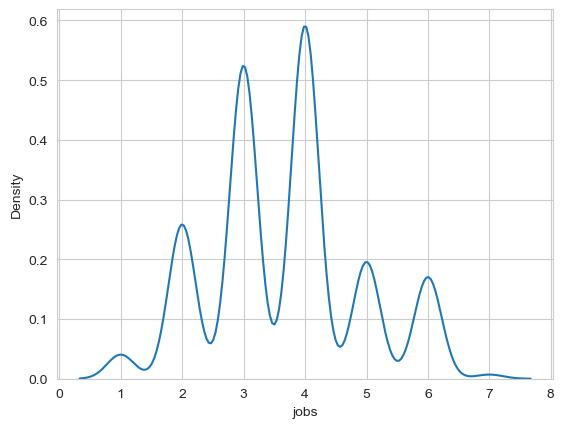

In [9]:
#visualize jobs variable
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(data.jobs)

In [10]:
#transform jobs variable
data.jobs = pd.cut(x = data.jobs,          ##Use cut when you need to segment and sort data values into bins
                   bins = [-1, 2.9,4.9,9], ##from-1to2.9 (=1,2), from+2.91to4.9 (=3,4), from+4.91to9 (=5,6,7,8)
                   labels = [0,1,2])
data.jobs

0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [11]:
data.jobs = pd.factorize(data.jobs)[0]### just keep element 0
data.jobs


0       0
1       1
2       0
3       1
4       1
       ..
4865    0
4866    1
4867    2
4868    1
4869    1
Name: jobs, Length: 4870, dtype: int64

In [12]:
# alternatively
codes, uniques = pd.factorize(data.jobs)
codes

array([0, 1, 0, ..., 2, 1, 1], dtype=int64)

In [13]:
uniques

Int64Index([0, 1, 2], dtype='int64')

**Experience**

<AxesSubplot:xlabel='experience', ylabel='Density'>

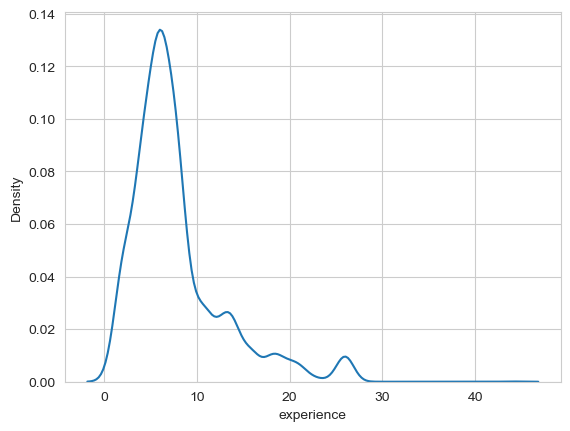

In [14]:
#visualize experience variable
sns.set_style('whitegrid')
sns.kdeplot(data.experience)

In [15]:
#transform experience variable
data.experience = pd.qcut(x = data.experience, #x=serie, qcut for continuous variable
                   q = 3,     ##Number of quantiles. 10 for deciles, 4 for quartiles, etc.  
                   labels = [0,1,2])
data.experience = pd.factorize(data.experience)[0]
data.experience

0       0
1       0
2       0
3       0
4       1
       ..
4865    2
4866    0
4867    0
4868    2
4869    0
Name: experience, Length: 4870, dtype: int64

**Minimum and remaining variables**

In [16]:
#Minimum variable
data.minimum.value_counts()

none    2746
some    1064
2        356
3        331
5        163
1        142
10        18
7         12
8         10
0.5        8
4          8
6          8
0          4
Name: minimum, dtype: int64

In [17]:
#Transform minimum variable
replacement_dictionary = {'none': 0,
                          '0': 0,
                          '0.5': 0,
                          '1': 1,
                          '2': 1,
                          'some': 2,
                          '3': 2,
                          '4': 2,
                          '5': 3,
                          '6': 3,
                          '7': 3,
                          '8': 3,
                          '10': 3}
data['minimum'] = data['minimum'].replace(replacement_dictionary)
data.minimum                       

0       3
1       3
2       3
3       3
4       2
       ..
4865    0
4866    0
4867    0
4868    0
4869    0
Name: minimum, Length: 4870, dtype: int64

In [18]:
#transforming remaining variables
data = pd.get_dummies(data, drop_first = True)
data.head()

,jobs,experience,minimum,gender_male,ethnicity_cauc,quality_low,call_yes,city_chicago,honors_yes,volunteer_yes,...,reqcomm_yes,reqeduc_yes,reqcomp_yes,reqorg_yes,industry_finance/insurance/real estate,industry_health/education/social services,industry_manufacturing,industry_trade,industry_transport/communication,industry_unknown
0,0,0,3,0,1,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,3,0,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,3,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,1,0,3,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
4,1,1,2,0,1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,0,0


### 2. CHAID MODEL

In [19]:
#get y name
y_name = data.call_yes.name
y_name

'call_yes'

In [20]:
#Get IV names
X_names = data.drop(columns = 'call_yes').columns
print(X_names)
print(len(X_names))

Index(['jobs', 'experience', 'minimum', 'gender_male', 'ethnicity_cauc',
       'quality_low', 'city_chicago', 'honors_yes', 'volunteer_yes',
       'military_yes', 'holes_yes', 'school_yes', 'email_yes', 'computer_yes',
       'special_yes', 'college_yes', 'equal_yes', 'wanted_office support',
       'wanted_other', 'wanted_retail sales', 'wanted_secretary',
       'wanted_supervisor', 'requirements_yes', 'reqexp_yes', 'reqcomm_yes',
       'reqeduc_yes', 'reqcomp_yes', 'reqorg_yes',
       'industry_finance/insurance/real estate',
       'industry_health/education/social services', 'industry_manufacturing',
       'industry_trade', 'industry_transport/communication',
       'industry_unknown'],
      dtype='object')
34


In [21]:
#CHAID tree
model = Tree.from_pandas_df(data,
                            dict(zip(X_names, 
                                     ['ordinal']*3 + ['nominal'] * 31)),
                            y_name,
                            max_depth = 3,
                            min_child_node_size = 250)

#Visualization

In [ ]:
!pip install -U kaleido

In [22]:
#import libraries
import orca
import plotly
import plotly.graph_objects as go

In [24]:
model.render(path =None,
             view = None)

OSError: [Errno 22] Invalid argument: 'trees\\2023-02-25 14:38:45.gv'

In [ ]:
!pip install plotly

In [25]:
sudo apt-get install graphviz

SyntaxError: invalid syntax (2529819739.py, line 1)

In [ ]:
conda install -c plotly plotly=5.13.0